# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$








In [49]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [50]:
f=lambda R,vox,voy,b,g: (g/b+voy)*(R/vox)+(g/b**2)*np.log(1-(R*b/vox))

2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.





El alcance máximo se obtiene para x=300.6920766931669m


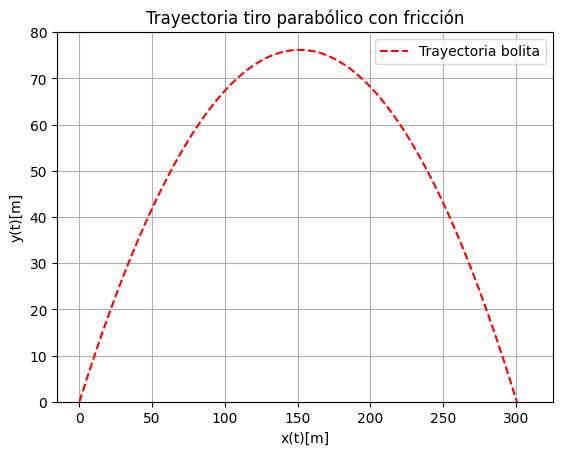

In [51]:
theta=np.pi/4
vo=55
vox=vo*np.cos(theta)
voy=vo*np.sin(theta)

b=0.005
g=9.8

params=(vox,voy,b,g)

#########################
#Estimación del cero
x=np.linspace(0,310,100)
y=f(x,*params)

plt.plot(x,y,'r--',label='Trayectoria bolita')
plt.title('Trayectoria tiro parabólico con fricción')
plt.xlabel('x(t)[m]')
plt.ylabel('y(t)[m]')
plt.ylim(0,80)
plt.grid()
plt.legend()
#########################

rootN=optimize.newton(f,250,args=params)   #Método de la secante

print(f'El alcance máximo se obtiene para x={rootN}m')

3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  




In [52]:
df=lambda R,vox,voy,b,g: (g/b+voy)/vox+(g/b**2)*(1/(1-R*b/vox))*(-b/vox)

rootNR=optimize.newton(f,250,df,args=params)        #Método de Newton-Raphson
print(f'El alcance máximo se obtiene para x={rootNR}m')

tv=lambda R,vox,b: -np.log(1-R*b/vox)/b
param=(vox,b)

tiempo=tv(rootNR,*param)

print(f'EL tiempo de vuelo total para la bolita es de t={tiempo}s')

El alcance máximo se obtiene para x=300.6920766931981m
EL tiempo de vuelo total para la bolita es de t=7.885101833164411s


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.



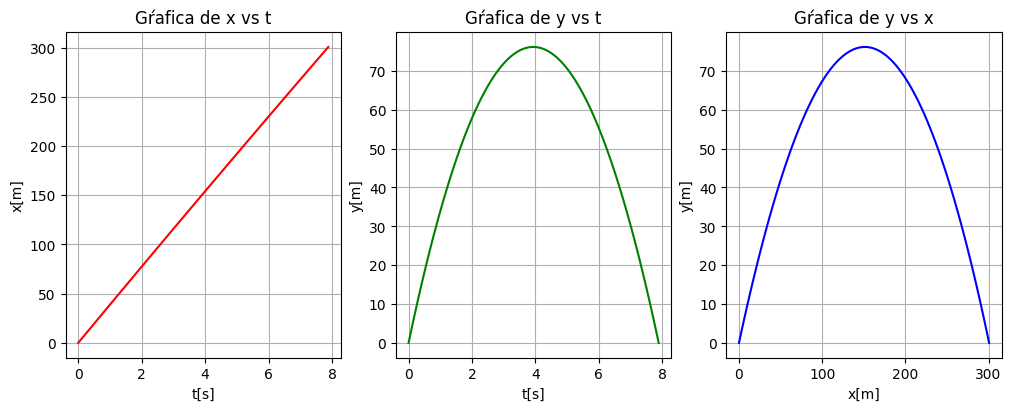

In [53]:
t=np.linspace(0,tiempo,100)

x=lambda t,vox,b: vox*(1-np.exp(-b*t))/b
paramsx=(vox,b)

y=lambda t,voy,b: (g/b+voy)*(1-np.exp(-b*t))/b-(g*t/b)
paramsy=(voy,b)

fig,axes=plt.subplots(1,3,figsize=(10,4),layout='constrained')

axes[0].plot(t,x(t,*paramsx),'r-')
axes[0].set_title('Gŕafica de x vs t')
axes[0].set_xlabel('t[s]')
axes[0].set_ylabel('x[m]')
axes[0].grid()

axes[1].plot(t,y(t,*paramsy),'g-')
axes[1].set_title('Gŕafica de y vs t')
axes[1].set_xlabel('t[s]')
axes[1].set_ylabel('y[m]')
axes[1].grid()

axes[2].plot(x(t,*paramsx),y(t,*paramsy),'b-')
axes[2].set_title('Gŕafica de y vs x')
axes[2].set_xlabel('x[m]')
axes[2].set_ylabel('y[m]')
axes[2].grid()

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.



In [54]:
theta=np.arange(0,90,5)
theta=np.deg2rad(theta)

vo=40
vox=vo*np.cos(theta)
voy=vo*np.sin(theta)

b=0.009
g=9.8

R=np.zeros(len(vox))
T=np.zeros(len(vox))

for i in range(len(vox)):
    x=np.linspace(0,200,1000)
    paras=(vox[i],voy[i],b,g)
    param=(vox[i],b)
    y=f(x,*paras)

    o=0.00001
    k=200

    rootB=optimize.bisect(f,o,k,args=paras)         #Métpdo de bisección
    R[i]=rootB
    T[i]=tv(rootB,*param)
    
R,T

(array([2.22166207e-05, 2.82301483e+01, 5.53686016e+01, 8.06091675e+01,
        1.03212294e+02, 1.22525703e+02, 1.38001967e+02, 1.49212653e+02,
        1.55858773e+02, 1.57777381e+02, 1.54944282e+02, 1.47472897e+02,
        1.35609436e+02, 1.19724604e+02, 1.00302117e+02, 7.79244005e+01,
        5.32558604e+01, 2.70241625e+01]),
 array([5.55415517e-07, 7.10717772e-01, 1.41453479e+00, 2.10615474e+00,
        2.78040531e+00, 3.43227451e+00, 4.05694500e+00, 4.64982624e+00,
        5.20658450e+00, 5.72317041e+00, 6.19584428e+00, 6.62119894e+00,
        6.99618018e+00, 7.31810474e+00, 7.58467591e+00, 7.79399668e+00,
        7.94458049e+00, 8.03535955e+00]))

6. Realice un gráfico de $R$ vs $t_v$



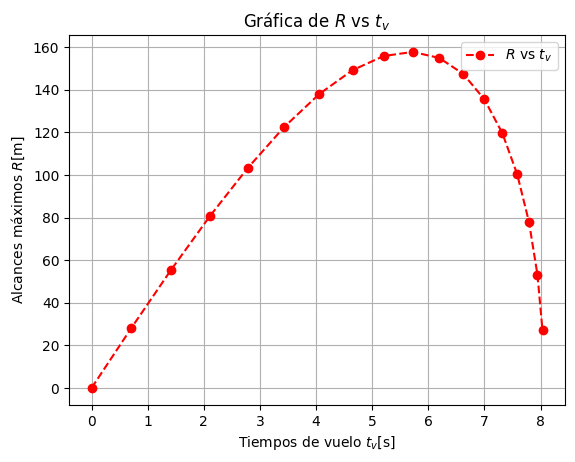

In [55]:
plt.plot(T,R,'ro--',label='$R$ vs $t_v$')
plt.title('Gráfica de $R$ vs $t_v$')
plt.xlabel('Tiempos de vuelo $t_v$[s]')
plt.ylabel('Alcances máximos $R$[m]')
plt.grid()
plt.legend()

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.

array([0.        , 0.08726646, 0.17453293, 0.26179939, 0.34906585,
       0.43633231, 0.52359878, 0.61086524, 0.6981317 , 0.78539816,
       0.87266463, 0.95993109, 1.04719755, 1.13446401, 1.22173048,
       1.30899694, 1.3962634 , 1.48352986])

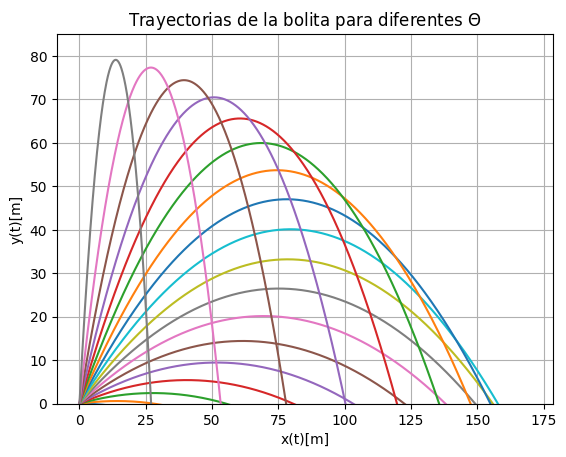

In [56]:
theta=np.arange(0,90,5)
theta=np.deg2rad(theta)

vo=40
vox=vo*np.cos(theta)
voy=vo*np.sin(theta)

b=0.009
g=9.8

for i in range(len(vox)):
    x=np.linspace(0,170,1000)

    params=(vox[i],voy[i],b,g)
    y=f(x,*params)
    
    plt.plot(x,y,'-',label=i)

plt.title('Trayectorias de la bolita para diferentes $\Theta$')
plt.xlabel('x(t)[m]')
plt.ylabel('y(t)[m]')
plt.ylim(0,85)
plt.grid()
#plt.legend()
theta